___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
#data
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
#model saving
import pickle
from tensorflow.keras.models import load_model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_v, X_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [4]:
x_train.max()

255

In [5]:
X_train_v.max()

255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
X_train_v.shape

(54000, 28, 28)

In [8]:
X_val.shape

(6000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_val.shape

(6000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

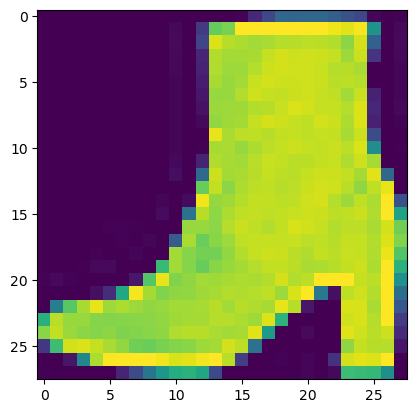

In [13]:
plt.imshow(X_train_v[1])
plt.show()

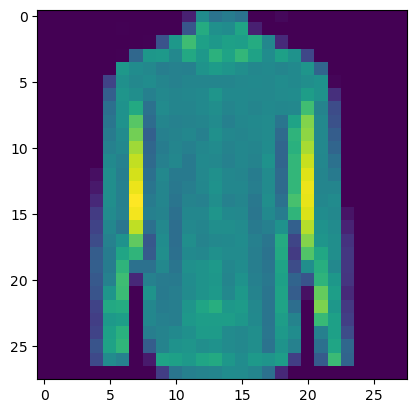

In [14]:
plt.imshow(X_train_v[16])
plt.show()

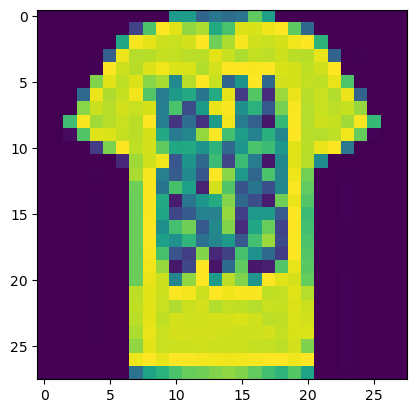

In [15]:
plt.imshow(X_train_v[11])  
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
x_train.max()

255

In [17]:
X_train_v.max()

255

In [18]:
X_val.max()

255

In [19]:
x_test.max()

255

In [20]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [21]:
X_train_v = X_train_v.astype("float32")
X_val = X_val.astype("float32")
X_train_v /= 255
X_val /= 255

In [22]:
X_train_v.max()

1.0

In [23]:
X_train.max()

1.0

In [24]:
X_val.max()

1.0

In [25]:
X_test.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
X_train_vs = np.expand_dims(X_train_v, -1)# adding a fourth dimension for batch so the model can predict
X_val_s = np.expand_dims(X_val, -1)

In [27]:
X_train_s = np.expand_dims(X_train, -1)
X_test_s = np.expand_dims(X_test, -1)

In [28]:
X_train_s.shape

(60000, 28, 28, 1)

In [29]:
X_val_s.shape

(6000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
y_train_vc = to_categorical(y_train_v)
y_val_vc = to_categorical(y_val)

In [31]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [32]:
y_train_vc.max()

1.0

In [33]:
y_val_vc.max()

1.0

In [34]:
y_train_c.max()

1.0

In [35]:
y_test_c.max()

1.0

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu",
                 padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 128)               2986112   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2987722 (11.40 MB)
Trainable params: 2987722 (11.40 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [94]:
#experimental model
model_r = Sequential(
    [
        Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 
        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),
        Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides = (1, 1)),
        Flatten(),
        Dense(120,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(10,activation='softmax')

    ]#, name= None
)
model_r.compile(loss=tf.keras.losses.CategoricalCrossentropy(),#from_logits=True),
optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"])

In [95]:
model_r.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 average_pooling2d_1 (Avera  (None, 26, 26, 32)        0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_8 (Dense)             (None, 120)              

In [85]:
model_do = Sequential()

model_do.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu",
                 padding="same"))
model_do.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))
model_do.add(Flatten())
model_do.add(Dense(128, activation="relu"))
model_do.add(tf.keras.layers.Dropout(0.2))
model_do.add(Dense(64, activation="relu"))
model_do.add(tf.keras.layers.Dropout(0.2))
model_do.add(Dense(10, activation="softmax"))

model_do.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.003),
                 metrics=["accuracy"])

In [86]:
model_do.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 23328)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               2986112   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [40]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25,
                                           restore_best_weights=True)

In [41]:
model_history = model.fit(X_train_vs, y_train_vc, batch_size=32, epochs=50, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))#32 or less batch size

Epoch 1/50
1688/1688 [==============================] - 56s 33ms/step - loss: 0.3994 - accuracy: 0.8580 - val_loss: 0.2949 - val_accuracy: 0.8952
Epoch 2/50
1688/1688 [==============================] - 56s 33ms/step - loss: 0.2616 - accuracy: 0.9055 - val_loss: 0.2747 - val_accuracy: 0.9028
Epoch 3/50
1688/1688 [==============================] - 56s 33ms/step - loss: 0.2194 - accuracy: 0.9194 - val_loss: 0.2616 - val_accuracy: 0.9067
Epoch 4/50
1688/1688 [==============================] - 56s 33ms/step - loss: 0.1911 - accuracy: 0.9302 - val_loss: 0.2644 - val_accuracy: 0.9108
Epoch 5/50
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1664 - accuracy: 0.9394 - val_loss: 0.2349 - val_accuracy: 0.9170
Epoch 6/50
1688/1688 [==============================] - 56s 33ms/step - loss: 0.1467 - accuracy: 0.9468 - val_loss: 0.3085 - val_accuracy: 0.9045
Epoch 7/50
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1305 - accuracy: 0.9531 - val_loss: 0.2775 -

In [96]:
model_r_history = model_r.fit(X_train_vs, y_train_vc, batch_size=32, epochs=50, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))#

Epoch 1/50
1688/1688 [==============================] - 80s 47ms/step - loss: 1.6567 - accuracy: 0.5795 - val_loss: 2.5267 - val_accuracy: 0.5468
Epoch 2/50
1688/1688 [==============================] - 79s 47ms/step - loss: 1.3094 - accuracy: 0.6528 - val_loss: 1.3888 - val_accuracy: 0.6540
Epoch 3/50
1688/1688 [==============================] - 80s 47ms/step - loss: 1.0905 - accuracy: 0.6762 - val_loss: 0.9896 - val_accuracy: 0.7175
Epoch 4/50
1688/1688 [==============================] - 80s 48ms/step - loss: 1.0539 - accuracy: 0.6940 - val_loss: 0.9872 - val_accuracy: 0.7053
Epoch 5/50
1688/1688 [==============================] - 79s 47ms/step - loss: 1.0123 - accuracy: 0.7062 - val_loss: 1.0489 - val_accuracy: 0.7003
Epoch 6/50
1688/1688 [==============================] - 80s 47ms/step - loss: 1.0195 - accuracy: 0.6967 - val_loss: 1.0782 - val_accuracy: 0.6372
Epoch 7/50
1688/1688 [==============================] - 79s 47ms/step - loss: 0.9957 - accuracy: 0.7005 - val_loss: 1.0467 -

In [88]:
model_history_do = model_do.fit(X_train_vs, y_train_vc, batch_size=32, epochs=50, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/50
1688/1688 [==============================] - 86s 50ms/step - loss: 1.5672 - accuracy: 0.5305 - val_loss: 0.9790 - val_accuracy: 0.7102
Epoch 2/50
1688/1688 [==============================] - 86s 51ms/step - loss: 1.0175 - accuracy: 0.6637 - val_loss: 0.7465 - val_accuracy: 0.7650
Epoch 3/50
1688/1688 [==============================] - 86s 51ms/step - loss: 0.8628 - accuracy: 0.7097 - val_loss: 0.6553 - val_accuracy: 0.7887
Epoch 4/50
1688/1688 [==============================] - 86s 51ms/step - loss: 0.7837 - accuracy: 0.7381 - val_loss: 0.6068 - val_accuracy: 0.7985
Epoch 5/50
1688/1688 [==============================] - 86s 51ms/step - loss: 0.7302 - accuracy: 0.7529 - val_loss: 0.5722 - val_accuracy: 0.8123
Epoch 6/50
1688/1688 [==============================] - 86s 51ms/step - loss: 0.6881 - accuracy: 0.7675 - val_loss: 0.5448 - val_accuracy: 0.8170
Epoch 7/50
1688/1688 [==============================] - 86s 51ms/step - loss: 0.6593 - accuracy: 0.7763 - val_loss: 0.5241 -

**TASK 7: Plot values of metrics you used in your model.**

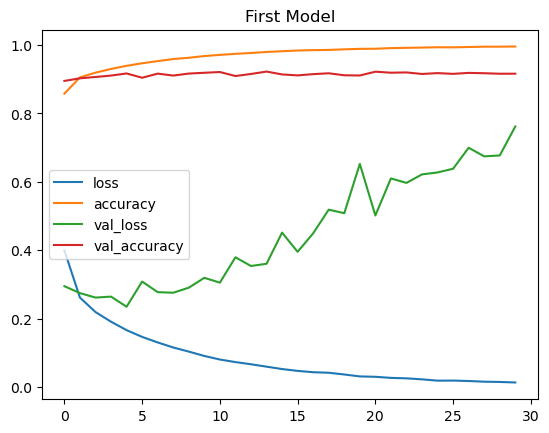

In [72]:
loss_df_model = pd.DataFrame(model_history.history)
loss_df_model.plot(title = 'First Model');

First Model is overfitting. The second model will prevent this issue.

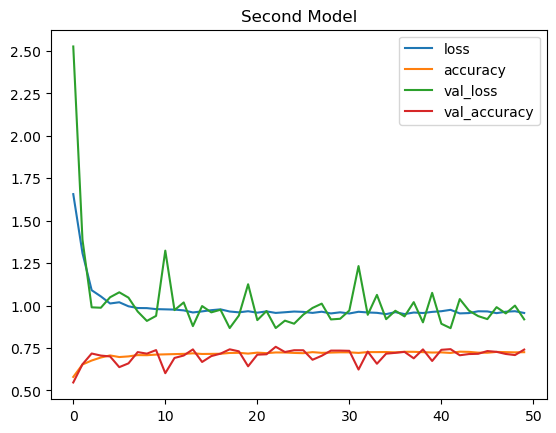

In [97]:
loss_df_model_r = pd.DataFrame(model_r.history.history)
loss_df_model_r.plot(title = 'Second Model');

The second model is generalized well as you can see from the validation loss.

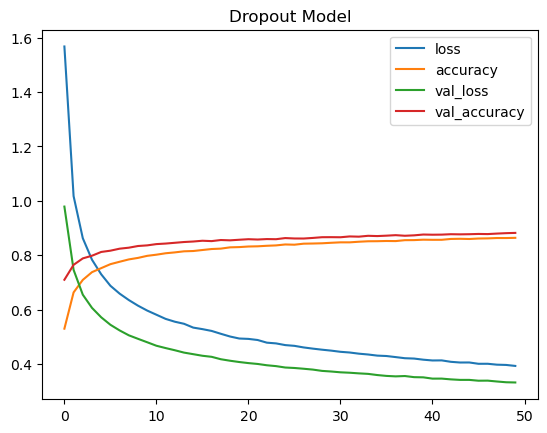

In [89]:
loss_df_model_do = pd.DataFrame(model_history_do.history)
loss_df_model_do.plot(title = 'Dropout Model');

The dropout model is not overfitting.

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [55]:
def conf_mat(model, X_test, y_test):
    pred_prob = model.predict(X_test)
    y_pred = np.argmax(pred_prob, axis=1)
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------------")
    plt.figure(figsize=(9, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=0.5, linecolor="black",
        fmt="g", annot_kws={"size": 15},)
    plt.title("prediction")
    plt.show();
    print("\n")
    correct = np.equal(y_test, y_pred).sum()
    wrong= np.not_equal(y_test, y_pred).sum()
    plt.bar(['Correct','Wrong'] , [correct,wrong] )
    plt.title("Correct prediction VS wrong prediction")
    plt.show();

In [69]:
def plot_multiclass_roc(model, X_test, y_test, n_classes, figsize=(10,10)):
    #y_score = clf.decision_function(X_test)
    y_score = model.predict(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### First Model Evaluation

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.75      0.91      0.82      1000
           3       0.92      0.91      0.91      1000
           4       0.86      0.80      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.67      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

-------------------------------------------------------------


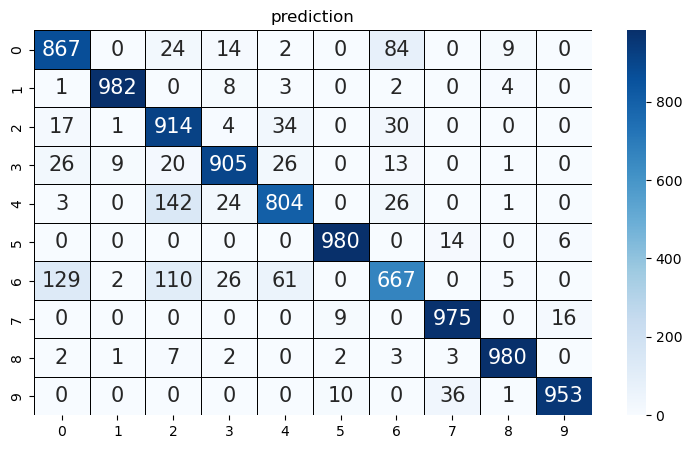

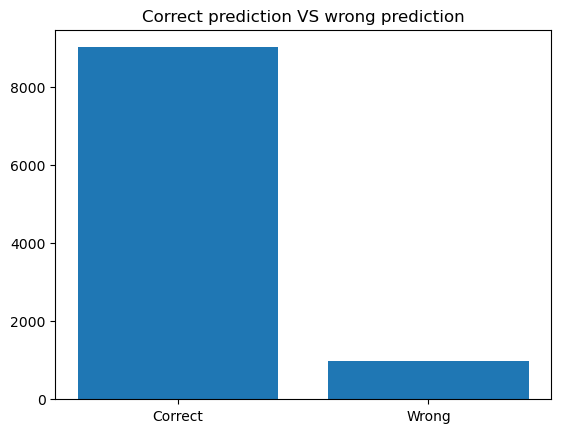

In [74]:
conf_mat(model, X_test_s, y_test)

313/313 [==============================] - 2s 8ms/step


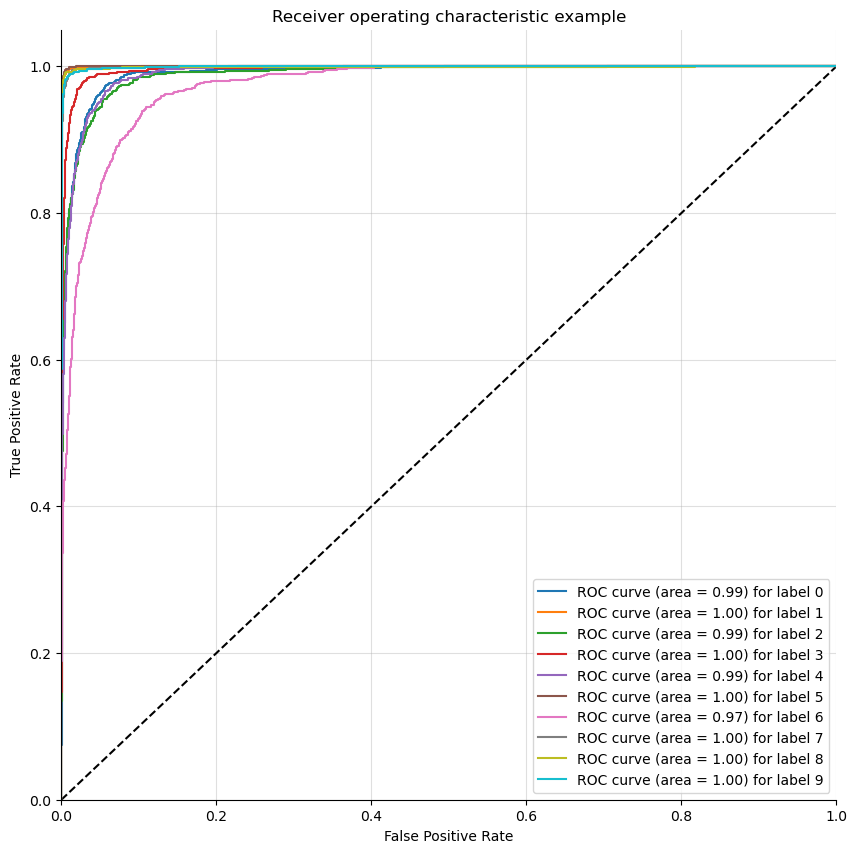

In [106]:
plot_multiclass_roc(model, X_test_s, y_test, 10)

Our first model does not seem to be overfitted in the roc curve plot.

### Second Model Evaluation

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.84      0.92      0.88      1000
           2       0.68      0.44      0.54      1000
           3       0.67      0.79      0.72      1000
           4       0.55      0.61      0.58      1000
           5       0.95      0.77      0.85      1000
           6       0.42      0.42      0.42      1000
           7       0.84      0.88      0.86      1000
           8       0.91      0.92      0.91      1000
           9       0.80      0.94      0.87      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

-------------------------------------------------------------


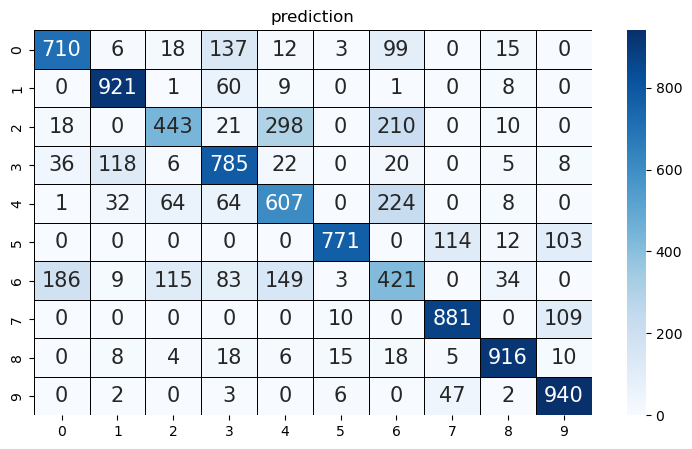

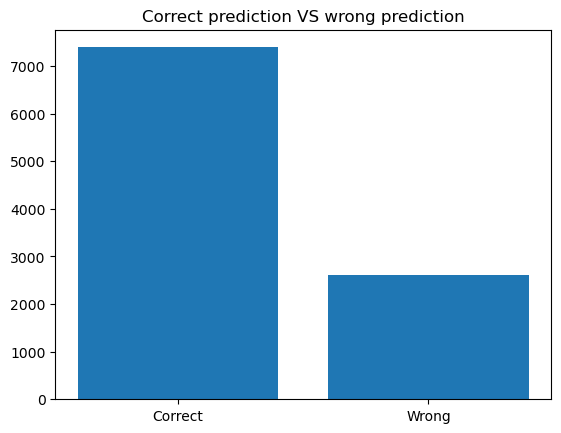

In [98]:
conf_mat(model_r, X_test_s, y_test)

313/313 [==============================] - 3s 11ms/step


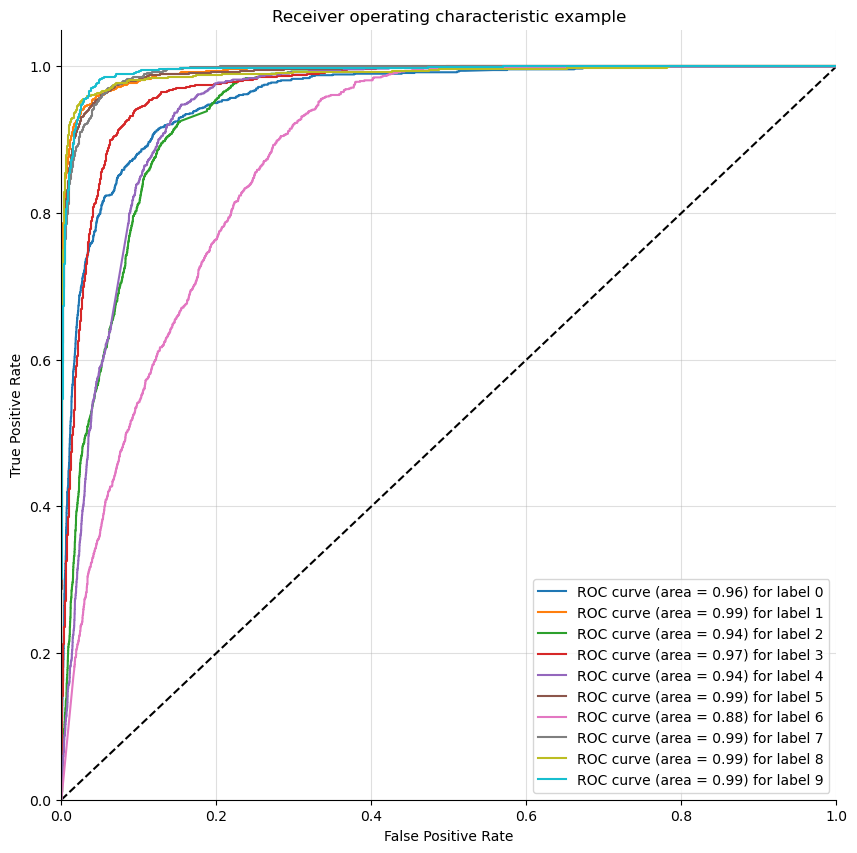

In [107]:
plot_multiclass_roc(model_r, X_test_s, y_test, 10)

The results are good with the second model (regularized). It performs the worst on label 6 which is the 'Shirt' label.

### Dropout Model Evaluation

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.82      0.78      0.80      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.79      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.67      0.67      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

-------------------------------------------------------------


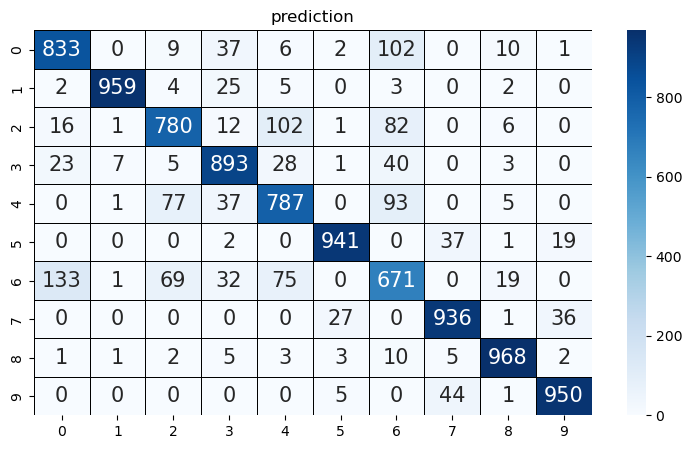

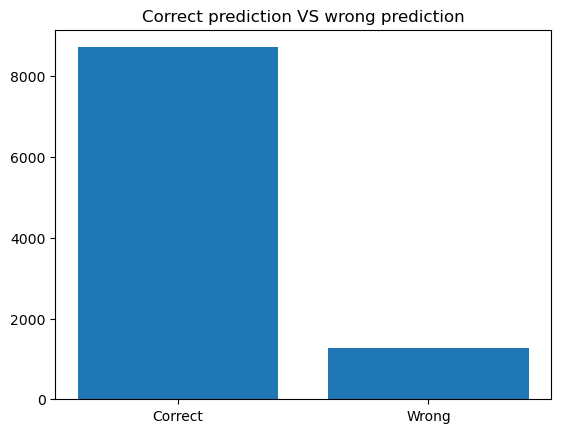

In [90]:
conf_mat(model_do, X_test_s, y_test)

313/313 [==============================] - 3s 8ms/step


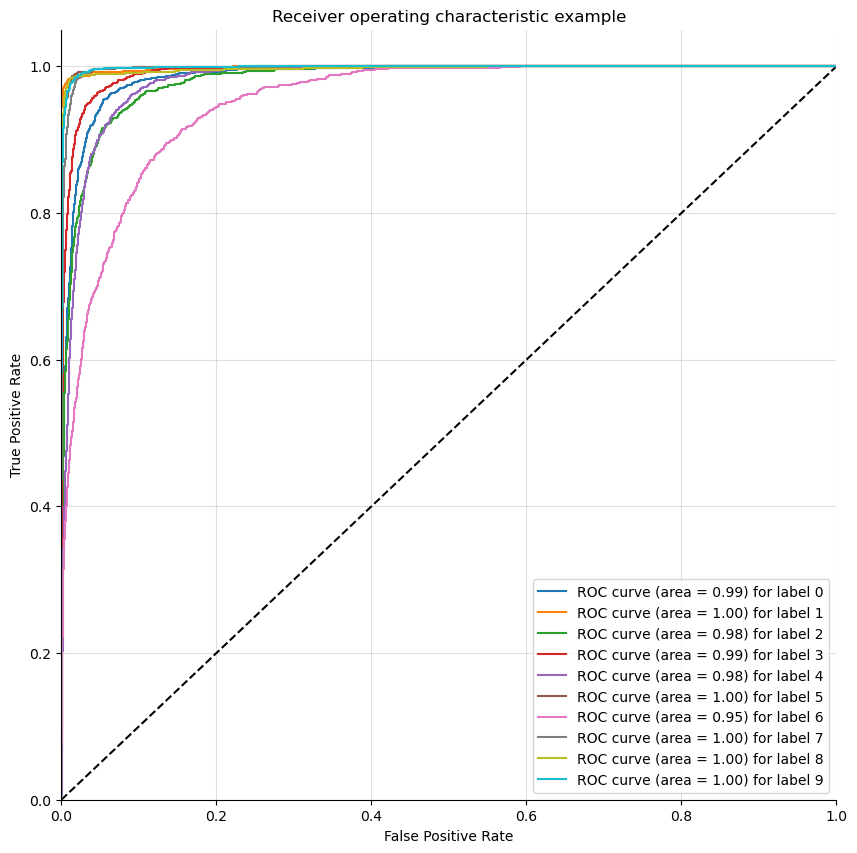

In [108]:
plot_multiclass_roc(model_do, X_test_s, y_test, 10)

The dropout model has excellent performance.

### Visualizing The Models

In [101]:
score = model.evaluate(X_test_s, y_test_c, verbose=0)
score_r = model_r.evaluate(X_test_s, y_test_c, verbose=0)
score_do = model_do.evaluate(X_test_s, y_test_c, verbose=0)
models_scores = pd.DataFrame({'Models':
                              ['First Model', 'Second Model', 'Dropout Model'], 
                              'Loss':[score[0], score_r[0], score_do[0]],
                             'Accuracy':[score[1], score_r[1], score_do[1]]})

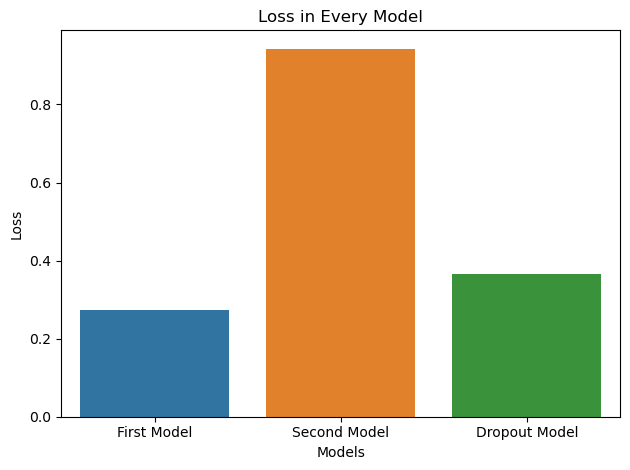

In [102]:
sns.barplot(data = models_scores, x = 'Models', y = 'Loss')
plt.title('Loss in Every Model')
plt.tight_layout();

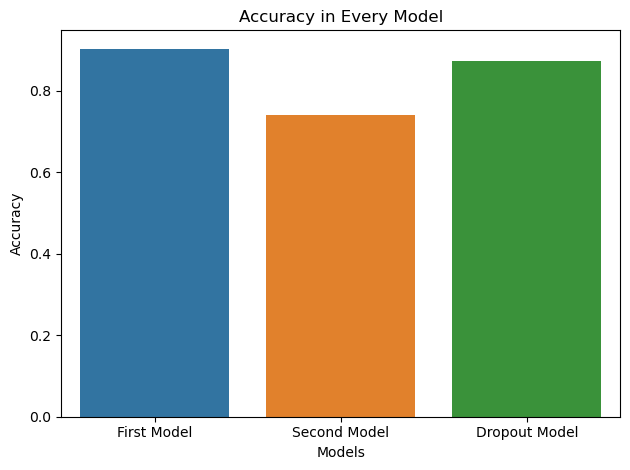

In [103]:
sns.barplot(data = models_scores, x = 'Models', y = 'Accuracy')
plt.title('Accuracy in Every Model')
plt.tight_layout();

In general, the first model is the best performing model and the second model is the weakest. I will do predictions on all models since all of them still perform really well in general.

## Prediction

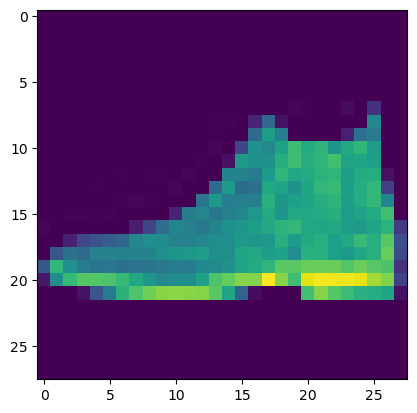

In [78]:
#chose the ankleboots for our models to predict
plt.imshow(X_test_s[0])
plt.show()

In [79]:
y_test[0]

9

In [93]:
classes[y_test[0]]

'Ankle boot'

In [80]:
#first model
predicted_value = model.predict(np.expand_dims(X_test_s[0], 0))
predicted_value

1/1 [==============================] - 0s 333ms/step


array([[6.3662930e-07, 1.8635800e-08, 3.9907840e-07, 5.4189167e-07,
        5.2824697e-07, 7.9417179e-05, 3.4636940e-07, 2.1913364e-04,
        2.1393637e-06, 9.9969685e-01]], dtype=float32)

In [81]:
#second model
predicted_r_value = model_r.predict(np.expand_dims(X_test_s[0], 0))
predicted_r_value

1/1 [==============================] - 0s 23ms/step


array([[4.5439079e-05, 8.6114851e-06, 4.0144307e-05, 8.4778189e-04,
        5.2356347e-05, 1.9068835e-02, 2.9909974e-05, 2.4511670e-01,
        8.7287085e-04, 7.3391736e-01]], dtype=float32)

In [104]:
#dropout model
predicted_do_value = model_do.predict(np.expand_dims(X_test_s[0], 0))
predicted_do_value

1/1 [==============================] - 0s 26ms/step


array([[1.1300208e-03, 5.6102395e-04, 1.0505875e-03, 2.1438617e-03,
        7.6016720e-04, 9.8875724e-03, 1.9934748e-03, 7.7663526e-02,
        7.9423757e-03, 8.9686739e-01]], dtype=float32)

First model predicted value:  Ankle boot 
Second model predicted value:  Ankle boot 
Dropout model predicted value:  Ankle boot 
Real value : Ankle boot


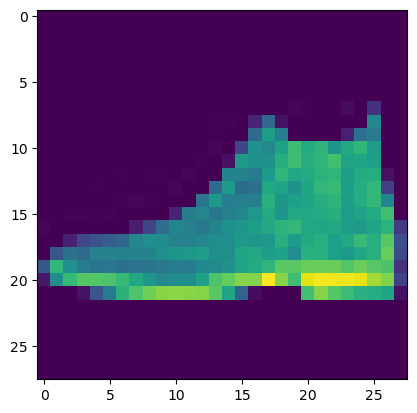

In [105]:
print('First model predicted value: ', classes[np.argmax(predicted_value)],
      '\nSecond model predicted value: ', classes[np.argmax(predicted_r_value)],
      '\nDropout model predicted value: ', classes[np.argmax(predicted_do_value)],
      '\nReal value :', classes[y_test[0]])
plt.imshow(X_test_s[0]);

References:
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

- https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___